In [10]:
import numpy as np
from numpy import linalg as LA
import tensorflow 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import spatial
from tensorflow.keras.preprocessing import image

In [3]:
input_shape = (224, 224, 3)

In [4]:
model = VGG19(weights='imagenet', input_shape=(input_shape[0], input_shape[1], input_shape[2]), pooling='max', include_top=False)

In [6]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.predict(np.zeros((1, 224, 224, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


array([[4.48303401e-01, 0.00000000e+00, 0.00000000e+00, 2.84858227e-01,
        8.92138958e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.20283812e-02, 0.00000000e+00,
        4.65520173e-01, 0.00000000e+00, 0.00000000e+00, 8.80752504e-01,
        0.00000000e+00, 4.81482327e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.66155712e-02, 0.00000000e+00, 8.21283162e-02,
        1.22575752e-01, 0.00000000e+00, 8.17030072e-01, 0.00000000e+00,
        2.84132689e-01, 0.00000000e+00, 6.24878287e-01, 0.00000000e+00,
        4.13837612e-01, 1.82653069e-02, 1.28934652e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.82241380e-01, 0.00000000e+00,
        0.00000000e+00, 7.84581676e-02, 0.00000000e+00, 1.43522099e-01,
        0.00000000e+00, 6.15550756e-01, 0.00000000e+00, 0.00000000e+00,
        1.01186052e-01, 0.00000000e+00, 5.55473149e-01, 1.505764

In [12]:
def vgg19_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [13]:
image_path = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images/"

In [14]:
image_list = [os.path.join(image_path, f) for f in os.listdir(image_path)]

features = []
names = []
for img in os.listdir(image_path):
    X = vgg19_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
vgg19_features = "VGG19Features.h5"
h5f = h5py.File(vgg19_features, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close

<bound method File.close of <HDF5 file "VGG19Features.h5" (mode r+)>>

In [17]:
open_h5f = h5py.File("VGG19Features.h5", "r")
features = open_h5f['dataset_1'][:]
image_name = open_h5f['dataset_2'][:]
open_h5f.close()

In [18]:
query_image = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/test_image/2defbeec7d.jpg"

In [24]:
from skimage import io, img_as_ubyte
from scipy import spatial

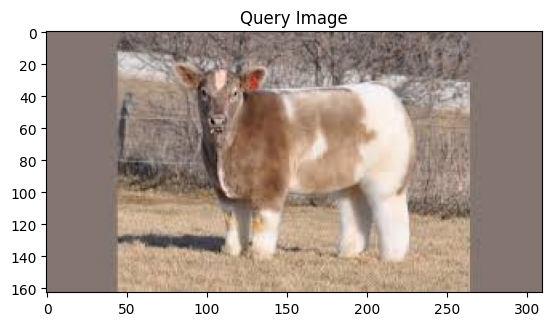

In [21]:
plt.imshow(io.imread(query_image))
plt.title('Query Image')
plt.show()

In [22]:
X = vgg19_extract_feature(query_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


In [28]:
scores = []
for i in range(features.shape[0]):
    score = 1 - spatial.distance.cosine(X, features[i])
    scores.append(score)
scores = np.array(scores)
rank_id = np.argsort(scores)[::-1]
rank_score = scores[rank_id]


In [34]:
image_directory = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images"

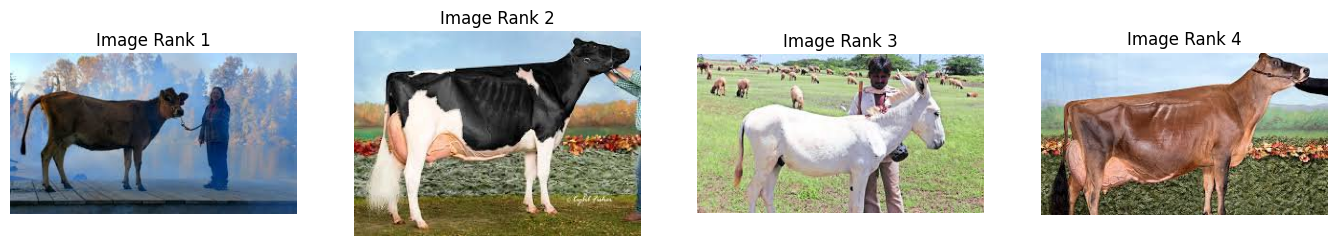

In [35]:
n = 4	
lists = [os.path.join(image_directory, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(image_directory, image_name[index]) 
         for i, index in enumerate(rank_id[0:n])]

num_images = len(lists)
fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
for i, image_path in enumerate(lists):
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)  
        axes[i].imshow(img)  
        axes[i].axis('off')  
        axes[i].set_title(f"Image Rank {i+1}")
    else:
        print(f"File not found: {image_path}") 
plt.show()